# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text)

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [6]:
soup

<!DOCTYPE html>
<html lang="ru" prefix="og: http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>N + 1: научные статьи, новости, открытия</title>
<link href="/front-build/css/main.css" rel="stylesheet"/>
<link href="/front-build/css/app.css" rel="stylesheet"/>
<link href="/images/favicon-bw.png" rel="icon"/>
<link href="https://nplus1.ru" rel="canonical"/>
<meta content="8c90b02c84ac3b72" name="yandex-verification"/>
<meta content="b419949322895fc9106e24ed01be58ac" name="pmail-verification"/>
<script>window.yaContextCb = window.yaContextCb || []</script>
<script async="" src="https://yandex.ru/ads/system/context.js"></script>
<meta content="N + 1: научные статьи, новости, открытия" property="og:site_name"/>
<meta content="N + 1: научные статьи, новости, открытия" property="og:title"/>
<meta content="https://nplus1.ru/images/share_snippet.png" property="og:image"/>
<meta content="https://nplus1.ru" property="og:u

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="ru" prefix="og: http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   N + 1: научные статьи, новости, открытия
  </title>
  <link href="/front-build/css/main.css" rel="stylesheet"/>
  <link href="/front-build/css/app.css" rel="stylesheet"/>
  <link href="/images/favicon-bw.png" rel="icon"/>
  <link href="https://nplus1.ru" rel="canonical"/>
  <meta content="8c90b02c84ac3b72" name="yandex-verification"/>
  <meta content="b419949322895fc9106e24ed01be58ac" name="pmail-verification"/>
  <script>
   window.yaContextCb = window.yaContextCb || []
  </script>
  <script async="" src="https://yandex.ru/ads/system/context.js">
  </script>
  <meta content="N + 1: научные статьи, новости, открытия" property="og:site_name"/>
  <meta content="N + 1: научные статьи, новости, открытия" property="og:title"/>
  <meta content="https://nplus1.ru/images/share_snippet.png" property="og:image"/>
  

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [9]:
for link in soup.find_all('a'):
    print(link.get('href'))

/search
https://offline.nplus1.ru/
https://nplus.pro/
https://nplus1.ru/about
https://nplus1.ru/difficult
https://nplus1.ru/adv
https://nplus1.ru/blog/2022/04/01/samotek
/search/empty/869
/search/empty/874
/search/empty/880
/search/empty/768
/search/empty/890
/search/empty/871
/search/empty/876
/search/empty/775
/search/empty/767
/search/empty/771
/search/empty/772
/search/empty/778
/search/empty/917
/search/empty/918
/search/empty/824
https://t.me/nplusone
https://vk.com/nplusone
https://ok.ru/nplus1
https://twitter.com/nplusodin
https://nplus1.ru/about
https://nplus1.ru/difficult
https://nplus1.ru/adv
https://nplus1.ru/news/2015/09/21/editor-thy-name
/search/empty/869
/search/empty/874
/search/empty/880
/search/empty/768
/search/empty/890
/search/empty/871
/search/empty/876
/search/empty/775
/search/empty/767
/search/empty/771
/search/empty/772
/search/empty/778
/search/empty/917
/search/empty/918
/search/empty/824
#
#
https://t.me/nplusone
https://vk.com/nplusone
https://ok.ru/nplus

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [10]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['https://nplus1.ru/news/2015/09/21/editor-thy-name',
 'https://nplus1.ru/news/2022/10/14/brain-model-rats',
 '/news/2022/10/15',
 'https://nplus1.ru/news/2022/10/15/chinese-coins',
 '/news/2022/10/14',
 'https://nplus1.ru/news/2022/10/14/anguilla-anguilla',
 '/news/2022/10/14',
 'https://nplus1.ru/news/2022/10/14/oldest-grave',
 '/news/2022/10/14',
 'https://nplus1.ru/news/2022/10/14/brain-model-rats',
 '/news/2022/10/14',
 'https://nplus1.ru/news/2022/10/14/gorn',
 '/news/2022/10/14',
 'https://nplus1.ru/news/2022/10/14/polyarizuemost-protona',
 '/news/2022/10/14',
 'https://nplus1.ru/news/2022/10/14/direct-imaging-technology',
 '/news/2022/10/14',
 'https://nplus1.ru/news/2022/10/14/charge-transfer-photocatalysis',
 '/news/2022/10/14',
 'https://nplus1.ru/news/2022/10/14/pangur-ban',
 '/news/2022/10/14',
 'https://nplus1.ru/news/2022/10/14/charles-xii',
 '/news/2022/10/13',
 'https://nplus1.ru/news/2022/10/13/edmontosaurus-mummy',
 '/news/2022/10/13',
 'https://nplus1.ru/news/2022/1

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [11]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ruhttps://nplus1.ru/news/2015/09/21/editor-thy-name',
 'https://nplus1.ruhttps://nplus1.ru/news/2022/10/14/brain-model-rats',
 'https://nplus1.ru/news/2022/10/15',
 'https://nplus1.ruhttps://nplus1.ru/news/2022/10/15/chinese-coins',
 'https://nplus1.ru/news/2022/10/14',
 'https://nplus1.ruhttps://nplus1.ru/news/2022/10/14/anguilla-anguilla',
 'https://nplus1.ru/news/2022/10/14',
 'https://nplus1.ruhttps://nplus1.ru/news/2022/10/14/oldest-grave',
 'https://nplus1.ru/news/2022/10/14',
 'https://nplus1.ruhttps://nplus1.ru/news/2022/10/14/brain-model-rats',
 'https://nplus1.ru/news/2022/10/14',
 'https://nplus1.ruhttps://nplus1.ru/news/2022/10/14/gorn',
 'https://nplus1.ru/news/2022/10/14',
 'https://nplus1.ruhttps://nplus1.ru/news/2022/10/14/polyarizuemost-protona',
 'https://nplus1.ru/news/2022/10/14',
 'https://nplus1.ruhttps://nplus1.ru/news/2022/10/14/direct-imaging-technology',
 'https://nplus1.ru/news/2022/10/14',
 'https://nplus1.ruhttps://nplus1.ru/news/2022/10/14

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [12]:
url0 = urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

In [13]:
url0

'https://nplus1.ru/news/2022/10/14/brain-model-rats'

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [14]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="8c90b02c84ac3b72" name="yandex-verification"/>,
 <meta content="b419949322895fc9106e24ed01be58ac" name="pmail-verification"/>,
 <meta content="N + 1: научные статьи, новости, открытия" property="og:site_name"/>,
 <meta content="Человеческий мини-мозг прижился в мозге крысы и среагировал на прикосновение к усам" property="og:title"/>,
 <meta content="https://app-images.website.yandexcloud.net/706946/63497cbdf2e6d_cover_share.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2022/10/14/brain-model-rats" property="og:url"/>,
 <meta content="Модели органа, сделанные из клеток человека, прижились и развились в мозге крыс, после чего повлияли на поведение грызунов." property="og:description"/>,
 <meta content="article" property="og:type"/>,
 <meta content="2022-10-14" itemprop="datePublished"/>,
 <meta content="2022-10-14" itemprop="datePublished"/>,
 <meta conte

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [15]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Полина Гребенкина" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [16]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Полина Гребенкина" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [17]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Полина Гребенкина'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [18]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Полина Гребенкина'

Аналогичным образом извлечем дату, заголовок и описание.

In [20]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'twitter:description'})[0].attrs['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [21]:
soup0.find_all('p')

[<p class="text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6">Модели органа, сделанные из клеток человека, прижились и развились в мозге крыс, после чего повлияли на поведение грызунов.</p>,
 <p class="mb-6">Ученые из США придумали, как улучшить создание моделей человеческого мозга. В исследовании,<a href="https://www.nature.com/articles/s41586-022-05277-w"> опубликованном</a> в <em>Nature, </em>утверждается, что пересадка мозгового органоида новорожденным крысам позволяет добиться того, что не получалось раньше: искусственный мини-мозг приживается и взаимодействует с другими клетками в организме крысы, в том числе реагирует на внешние раздражители — например, на прикосновение к усам.</p>,
 <p class="mb-6">Поскольку изучать головной мозг и его патологии на человеке сложно, ученые вынуждены использовать для этой цели лабораторных животных — грызунов или даже собак. Проблема в том, что такие модели не отражают все характеристики человеческого мозга и процессы в нем. Поэтому

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [22]:
soup0.find_all('p')[0].find_all('a')

[]

In [24]:
soup0.find_all('p', {'class': 'mb-6'})[4].text

'Команда исследователей из Стэнфордского университета под руководством Серджиу Пашка (Sergiu P. Pașca) продвинулась в этом деле. Они перенесли мозговой органоид новорожденным крысам, а не взрослым, как делали их коллеги. В этот период в мозге еще не завершил свое развитие, что позволило органоиду прижиться и встроиться в его структуру. Кроме того, у мышей не было тимуса, а значит их адаптивный иммунитет не смог атаковать трансплантат.'

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [25]:
soup0.find_all('p')[0].find_all('a')[0].text

IndexError: list index out of range

In [26]:
rubrics = soup0.find_all('div', {'class' : 'flex-wrap col-span-6 md:col-span-12 lg:col-span-2 mt-5 -mb-2.5 lg:-mb-0 lg:mt-10 content-start mr-9'})[0].find_all('span', {'class' : 'group-hover:text-main transition-colors duration-75'})[3].text
rubrics

'Медицина'

In [ ]:
soup0.find_all('p')[0].find_all('a')[0].text

In [24]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['IT', 'Гаджеты']

In [24]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['IT', 'Гаджеты']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [26]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">3.6</span>]

И выберем оттуда текст.

In [27]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'3.6'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [27]:
text_list = soup0.find_all('p', {'class' : None})

In [28]:
text_list

[]

«Выцепим» все тексты (без тэгов) из полученного списка:

In [29]:
text = [t.text for t in text_list]

In [30]:
text

[]

Склеим все элементы списка `text` через пробел:

In [31]:
''.join(['1', '2', '3'])

'123'

In [32]:
final_text = ' '.join(text)
final_text

''

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [33]:
final_text = final_text.replace('\n', ' ')

In [34]:
final_text

''

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [36]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [37]:
from time import sleep

In [38]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(3) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [39]:
len(news)

29

In [40]:
news[0]

('https://nplus1.ru/news/2022/06/20/phrynocephalus-mystaceus',
 '2022-06-20',
 'Сергей Коленов',
 'Единственным назначением этих кожных складок оказалась защита от хищников.',
 'Круглоголовки отказались раскрывать «уши» перед сородичами',
 'Пустынные ящерицы ушастые круглоголовки в\xa0случае опасности пугают хищников, раскрывая ярко-красные складки в\xa0уголках рта. Зоологи предположили, что эти украшения могут использоваться и\xa0во\xa0время социальных взаимодействий, например, чтобы привлечь самку или прогнать соперника. Однако эксперименты не\xa0подтвердили данную идею: в\xa0присутствии сородичей ящерицы отказывались демонстрировать кожные складки. Результаты исследования опубликованы в\xa0статье для журнала Biological Journal of\xa0the Linnean Society. Ушастые круглоголовки (Phrynocephalus mystaceus)\xa0— типичные обитатели пустынь и\xa0полупустынь от\xa0Южной России до\xa0Ирана и\xa0Китая. На\xa0первый взгляд эти скромно окрашенные ящерицы из\xa0семейства агам (Agamidae) кажутся с

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [41]:
import pandas as pd

In [42]:
df = pd.DataFrame(news)

In [43]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2022/06/20/phrynocephal...,2022-06-20,Сергей Коленов,Единственным назначением этих кожных складок о...,Круглоголовки отказались раскрывать «уши» пере...,Пустынные ящерицы ушастые круглоголовки в случ...,[Зоология],2.7
1,https://nplus1.ru/news/2022/06/20/volumetric-a...,2022-06-20,Григорий Копиев,Но пока метод требует несколько часов для обуч...,Meta научила смартфоны создавать реалистичную ...,Разработчики из компании Meta создали алгоритм...,"[IT, Гаджеты]",3.6


Переименуем столбцы в базе.

In [44]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [45]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2022/06/20/phrynocephal...,2022-06-20,Сергей Коленов,Единственным назначением этих кожных складок о...,Круглоголовки отказались раскрывать «уши» пере...,Пустынные ящерицы ушастые круглоголовки в случ...,[Зоология],2.7
1,https://nplus1.ru/news/2022/06/20/volumetric-a...,2022-06-20,Григорий Копиев,Но пока метод требует несколько часов для обуч...,Meta научила смартфоны создавать реалистичную ...,Разработчики из компании Meta создали алгоритм...,"[IT, Гаджеты]",3.6


In [46]:
df.dtypes #object ~ string

link      object
date      object
author    object
desc      object
title     object
text      object
rubric    object
diffc     object
dtype: object

Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [47]:
df['diffc'] = df['diffc'].apply(float)

In [48]:
df.dtypes

link       object
date       object
author     object
desc       object
title      object
text       object
rubric     object
diffc     float64
dtype: object

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [49]:
df.diffc.describe()

count    29.000000
mean      4.368966
std       2.311787
min       1.100000
25%       2.600000
50%       3.900000
75%       6.500000
max       9.400000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

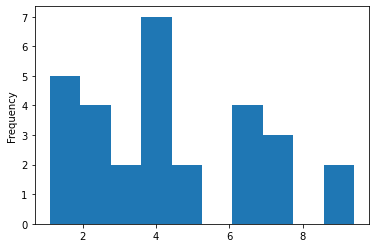

In [50]:
df.diffc.plot.hist();

Объединим рубрики в *text* в одну строку через запятую:

In [51]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [52]:
df.text[0]

'Пустынные ящерицы ушастые круглоголовки в\xa0случае опасности пугают хищников, раскрывая ярко-красные складки в\xa0уголках рта. Зоологи предположили, что эти украшения могут использоваться и\xa0во\xa0время социальных взаимодействий, например, чтобы привлечь самку или прогнать соперника. Однако эксперименты не\xa0подтвердили данную идею: в\xa0присутствии сородичей ящерицы отказывались демонстрировать кожные складки. Результаты исследования опубликованы в\xa0статье для журнала Biological Journal of\xa0the Linnean Society. Ушастые круглоголовки (Phrynocephalus mystaceus)\xa0— типичные обитатели пустынь и\xa0полупустынь от\xa0Южной России до\xa0Ирана и\xa0Китая. На\xa0первый взгляд эти скромно окрашенные ящерицы из\xa0семейства агам (Agamidae) кажутся совершенно непримечательными. Однако в\xa0случае опасности они преображаются. раздувают тело, расставляют ноги и\xa0широко раскрывает пасть. При этом ярко-красные кожные складки в\xa0углах их\xa0рта наливаются кровью и\xa0становятся похожими

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [53]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [54]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [55]:
df.clean_text[0]

'Пустынные ящерицы ушастые круглоголовки в случае опасности пугают хищников, раскрывая ярко-красные складки в уголках рта. Зоологи предположили, что эти украшения могут использоваться и во время социальных взаимодействий, например, чтобы привлечь самку или прогнать соперника. Однако эксперименты не подтвердили данную идею: в присутствии сородичей ящерицы отказывались демонстрировать кожные складки. Результаты исследования опубликованы в статье для журнала Biological Journal of the Linnean Society. Ушастые круглоголовки (Phrynocephalus mystaceus) — типичные обитатели пустынь и полупустынь от Южной России до Ирана и Китая. На первый взгляд эти скромно окрашенные ящерицы из семейства агам (Agamidae) кажутся совершенно непримечательными. Однако в случае опасности они преображаются. раздувают тело, расставляют ноги и широко раскрывает пасть. При этом ярко-красные кожные складки в углах их рта наливаются кровью и становятся похожими на уши (отсюда и происходит название вида). Такая демонстра

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [56]:
df.head()

,link,date,author,desc,title,text,rubric,diffc,clean_text
0,https://nplus1.ru/news/2022/06/20/phrynocephal...,2022-06-20,Сергей Коленов,Единственным назначением этих кожных складок о...,Круглоголовки отказались раскрывать «уши» пере...,Пустынные ящерицы ушастые круглоголовки в случ...,Зоология,2.7,Пустынные ящерицы ушастые круглоголовки в случ...
1,https://nplus1.ru/news/2022/06/20/volumetric-a...,2022-06-20,Григорий Копиев,Но пока метод требует несколько часов для обуч...,Meta научила смартфоны создавать реалистичную ...,Разработчики из компании Meta создали алгоритм...,"IT,Гаджеты",3.6,Разработчики из компании Meta создали алгоритм...
2,https://nplus1.ru/news/2022/06/20/millet,2022-06-20,Михаил Подрезов,Его использовали в качестве заупокойной пищи,В сосуде из тюркского погребения VII века обна...,Археологи исследовали заполнение керамического...,"Археология,Археология",3.2,Археологи исследовали заполнение керамического...
3,https://nplus1.ru/news/2022/06/20/Spin-charge-...,2022-06-20,Марат Хамадеев,"Для этого они облучали холодные атомы лития, в...",Физики подтвердили спин-зарядовое разделение в...,Физики из Китая и США смогли независимо измери...,Физика,7.1,Физики из Китая и США смогли независимо измери...
4,https://nplus1.ru/news/2022/06/20/fatherhood-r...,2022-06-20,Анастасия Ляшенко,Наличие прошлых отношений также повысило шансы...,Желание стать отцом привлекло женщин для долго...,"Австралийские исследователи выявили, что успех...",Психология,2.1,"Австралийские исследователи выявили, что успех..."


In [57]:
df.to_excel('nplus-news.xlsx', index=False)